# WeatherPy
----

### Analysis
* As expected, the weather becomes significantly warmer as one approaches the equator (0 Deg. Latitude). More interestingly, however, is the fact that the southern hemisphere tends to be warmer this time of year than the northern hemisphere. This may be due to the tilt of the earth.
* There is no strong relationship between latitude and cloudiness. However, it is interesting to see that a strong band of cities sits at 0, 80, and 100% cloudiness.
* There is no strong relationship between latitude and wind speed. However, in northern hemispheres there is a flurry of cities with over 20 mph of wind.

---

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [2]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import openweathermapy.core as ow

# Import API key
from api_keys import api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [3]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)



603

In [4]:
cities

['punta arenas',
 'karoi',
 'sao filipe',
 'sentyabrskiy',
 'barawe',
 'upernavik',
 'fuyang',
 'alofi',
 'nsanje',
 'jamestown',
 'illoqqortoormiut',
 'albany',
 'busselton',
 'kapaa',
 'rikitea',
 'along',
 'hambantota',
 'srednekolymsk',
 'pryazha',
 'caravelas',
 'sambava',
 'avarua',
 'carnarvon',
 'mataura',
 'vaini',
 'puerto ayora',
 'kununurra',
 'nikolskoye',
 'ponta do sol',
 'clyde river',
 'port lincoln',
 'mar del plata',
 'port macquarie',
 'nizhneyansk',
 'saint-philippe',
 'codrington',
 'airai',
 'palmer',
 'leh',
 'bethel',
 'thompson',
 'dongsheng',
 'tsihombe',
 'san carlos',
 'billings',
 'havelock',
 'chara',
 'makakilo city',
 'dikson',
 'pitimbu',
 'shangrao',
 'altukhovo',
 'eyl',
 'rio do sul',
 'tilichiki',
 'lodja',
 'antofagasta',
 'marsh harbour',
 'sai buri',
 'whitehorse',
 'kavaratti',
 'longlac',
 'mayor pablo lagerenza',
 'barentsburg',
 'khatanga',
 'zhigansk',
 'ushuaia',
 'butaritari',
 'bengkulu',
 'hobart',
 'cockburn town',
 'porto novo',
 'man

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


JSON
Example of API response:

{"coord":
{"lon":145.77,"lat":-16.92},
"weather":[{"id":803,"main":"Clouds","description":"broken clouds","icon":"04n"}],
"base":"cmc stations",
"main":{"temp":293.25,"pressure":1019,"humidity":83,"temp_min":289.82,"temp_max":295.37},
"wind":{"speed":5.1,"deg":150},
"clouds":{"all":75},
"rain":{"3h":3},
"dt":1435658272,
"sys":{"type":1,"id":8166,"message":0.0166,"country":"AU","sunrise":1435610796,"sunset":1435650870},
"id":2172797,
"name":"Cairns",
"cod":200}


In [5]:
# Save config information.
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "metric"

# Build partial query URL
query_url = f"{url}appid={api_key}&units={units}&q="

In [ ]:
#settings = {"units": "metric", "appid": api_key}

In [6]:
# set up lists to hold reponse info
lat = []
lon = []
cloudiness = []
pressure = []
windspeed = []
humidity = []
maxtemp = []
date = []
cityname = []
country = []
counter = 1

# Loop through the list of cities and perform a request for data on each
for city in cities:
    
    try:
        response = requests.get(query_url + city).json()
        print(f"Processing record {counter} for {city}")
        
        lat.append(response['coord']['lat'])
        lon.append(response['coord']['lon'])
        cloudiness.append(response['clouds']['all'])
        pressure.append(response['main']['pressure'])
        windspeed.append(response['wind']['speed'])
        humidity.append(response['main']['humidity'])
        maxtemp.append(response['main']['temp_max'])
        date.append(response['dt'])
        cityname.append(response['name'])
        country.append(response['sys']['country'])
    
        counter +=1
        
    except: 
        print("City not found. Skipping...")
        counter += 1
        
print(f"Processed {counter} cities' weather data.")
   

Processing record 1 for punta arenas
Processing record 2 for karoi
Processing record 3 for sao filipe
Processing record 4 for sentyabrskiy
City not found. Skipping...
Processing record 5 for barawe
City not found. Skipping...
Processing record 6 for upernavik
Processing record 7 for fuyang
Processing record 8 for alofi
Processing record 9 for nsanje
Processing record 10 for jamestown
Processing record 11 for illoqqortoormiut
City not found. Skipping...
Processing record 12 for albany
Processing record 13 for busselton
Processing record 14 for kapaa
Processing record 15 for rikitea
Processing record 16 for along
Processing record 17 for hambantota
Processing record 18 for srednekolymsk
Processing record 19 for pryazha
Processing record 20 for caravelas
Processing record 21 for sambava
Processing record 22 for avarua
Processing record 23 for carnarvon
Processing record 24 for mataura
Processing record 25 for vaini
Processing record 26 for puerto ayora
Processing record 27 for kununurra
P

Processing record 215 for cravo norte
Processing record 216 for mareeba
Processing record 217 for chapais
Processing record 218 for punta alta
Processing record 219 for chuy
Processing record 220 for pingliang
Processing record 221 for tsalenjikha
Processing record 222 for nanortalik
Processing record 223 for cockburn harbour
City not found. Skipping...
Processing record 224 for souillac
Processing record 225 for ginda
Processing record 226 for peleduy
Processing record 227 for laela
Processing record 228 for san miguel
Processing record 229 for san juan
Processing record 230 for barrow
Processing record 231 for saleaula
City not found. Skipping...
Processing record 232 for tuktoyaktuk
Processing record 233 for xingyi
Processing record 234 for kokopo
Processing record 235 for quatre cocos
Processing record 236 for pangai
Processing record 237 for bambous virieux
Processing record 238 for severo-yeniseyskiy
Processing record 239 for nenton
Processing record 240 for yendi
Processing reco

Processing record 430 for thinadhoo
Processing record 431 for bubaque
Processing record 432 for port keats
Processing record 433 for tidore
City not found. Skipping...
Processing record 434 for kavieng
Processing record 435 for umm lajj
Processing record 436 for broome
Processing record 437 for portland
Processing record 438 for tsaratanana
Processing record 439 for coihaique
Processing record 440 for afmadu
City not found. Skipping...
Processing record 441 for moron
Processing record 442 for los llanos de aridane
Processing record 443 for puerto suarez
Processing record 444 for gornopravdinsk
Processing record 445 for sagay
Processing record 446 for serowe
Processing record 447 for peniche
Processing record 448 for termoli
Processing record 449 for west bay
Processing record 450 for calatayud
Processing record 451 for victoria
Processing record 452 for mys shmidta
City not found. Skipping...
Processing record 453 for namatanai
Processing record 454 for jandaia do sul
Processing record

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [ ]:
len(id)

In [13]:
# create a data frame from cities, lat, and temp

weather_dict = {
    "City": cityname,
    "Country": country,
    "Latitude": lat,
    "Longitude": lon,
    "Maximum_Temp": maxtemp,
    "Cloudiness": cloudiness,
    "Pressure": pressure,
    "Windspeed": windspeed,
    "Humidity": humidity,
    "UnixDate": date
}
weather_data = pd.DataFrame(weather_dict)
weather_data.head()

,City,Country,Latitude,Longitude,Maximum_Temp,Cloudiness,Pressure,Windspeed,Humidity,UnixDate
0,Punta Arenas,CL,-53.16,-70.91,10.00,40,998.00,11.30,61,1554411286
1,Karoi,ZW,-16.82,29.68,17.60,0,1012.03,3.67,65,1554411574
2,Sao Filipe,CV,14.90,-24.50,21.50,0,1014.59,8.72,94,1554411412
3,Upernavik,GL,72.79,-56.15,-5.36,44,1012.43,10.77,94,1554411415
4,Fuyang,CN,30.05,119.96,12.78,40,1014.00,2.00,100,1554411528


In [15]:
convertdate = pd.to_datetime(weather_data['UnixDate'], unit='s')
convertdate

0     2019-04-04 20:54:46
1     2019-04-04 20:59:34
2     2019-04-04 20:56:52
3     2019-04-04 20:56:55
4     2019-04-04 20:58:48
5     2019-04-04 20:00:00
6     2019-04-04 20:59:35
7     2019-04-04 20:56:41
8     2019-04-04 20:56:04
9     2019-04-04 20:55:08
10    2019-04-04 20:53:23
11    2019-04-04 20:56:37
12    2019-04-04 20:58:10
13    2019-04-04 20:59:37
14    2019-04-04 20:57:03
15    2019-04-04 20:00:00
16    2019-04-04 20:57:36
17    2019-04-04 20:59:38
18    2019-04-04 20:30:00
19    2019-04-04 20:56:56
20    2019-04-04 20:56:42
21    2019-04-04 20:56:55
22    2019-04-04 20:16:31
23    2019-04-04 20:30:00
24    2019-04-04 20:53:53
25    2019-04-04 20:57:46
26    2019-04-04 20:00:00
27    2019-04-04 20:56:51
28    2019-04-04 20:59:16
29    2019-04-04 20:55:05
              ...        
513   2019-04-04 20:58:18
514   2019-04-04 21:00:04
515   2019-04-04 21:02:14
516   2019-04-04 20:00:00
517   2019-04-04 20:57:05
518   2019-04-04 21:02:15
519   2019-04-04 21:02:10
520   2019-0

In [16]:
weather_data['Date'] = convertdate

In [21]:
#weather_data.drop(columns=['UnixDate'], inplace=True)
weather_data.head()

,City,Country,Latitude,Longitude,Maximum_Temp,Cloudiness,Pressure,Windspeed,Humidity,Date
0,Punta Arenas,CL,-53.16,-70.91,10.00,40,998.00,11.30,61,2019-04-04 20:54:46
1,Karoi,ZW,-16.82,29.68,17.60,0,1012.03,3.67,65,2019-04-04 20:59:34
2,Sao Filipe,CV,14.90,-24.50,21.50,0,1014.59,8.72,94,2019-04-04 20:56:52
3,Upernavik,GL,72.79,-56.15,-5.36,44,1012.43,10.77,94,2019-04-04 20:56:55
4,Fuyang,CN,30.05,119.96,12.78,40,1014.00,2.00,100,2019-04-04 20:58:48


### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

#### Latitude vs. Temperature Plot

In [38]:
title_font = {'fontname':'Arial', 'size':'16', 'color':'black', 'weight':'normal',
              'verticalalignment':'bottom'}

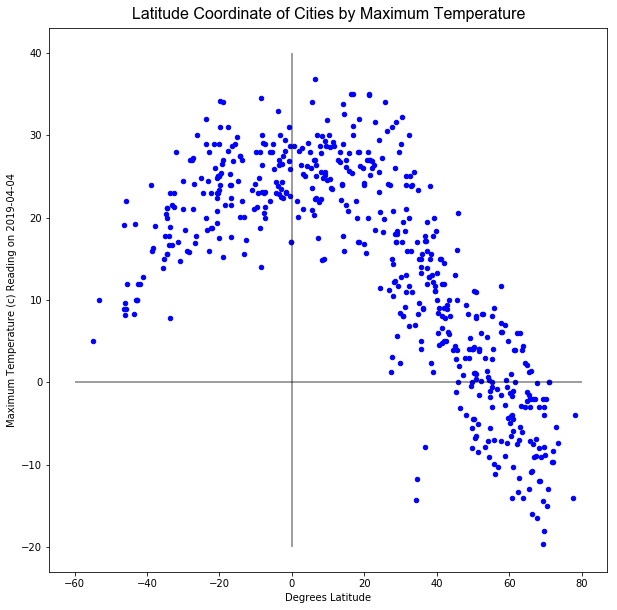

<Figure size 432x288 with 0 Axes>

In [58]:

ax1 = weather_data.plot.scatter(x='Latitude', y='Maximum_Temp', c='Blue')

plt.hlines(0, -60, 80, alpha=0.5)
plt.vlines(0, -20, 40, alpha=0.5)

plt.title("Latitude Coordinate of Cities by Maximum Temperature", fontdict=title_font)
plt.xlabel('Degrees Latitude')
plt.ylabel('Maximum Temperature (c) Reading on 2019-04-04')

# Show plot
fig = plt.gcf()
fig.set_size_inches(10, 10)
plt.show()

plt.savefig("latitude_temp.png")

#### Latitude vs. Humidity Plot

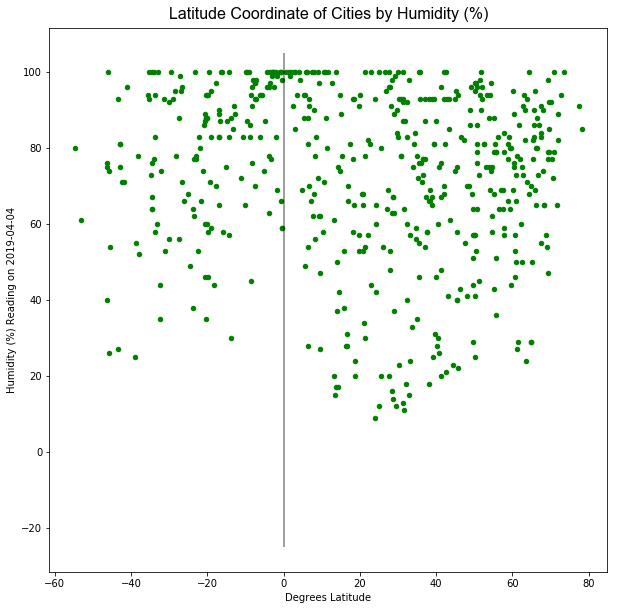

<Figure size 432x288 with 0 Axes>

In [59]:

ax1 = weather_data.plot.scatter(x='Latitude', y='Humidity', c='Green')

plt.vlines(0, -25, 105, alpha=0.5)

plt.title("Latitude Coordinate of Cities by Humidity (%)", fontdict=title_font)
plt.xlabel('Degrees Latitude')
plt.ylabel('Humidity (%) Reading on 2019-04-04')

# Show plot
fig = plt.gcf()
fig.set_size_inches(10, 10)
plt.show()

plt.savefig("latitude_humidity.png")

#### Latitude vs. Cloudiness Plot

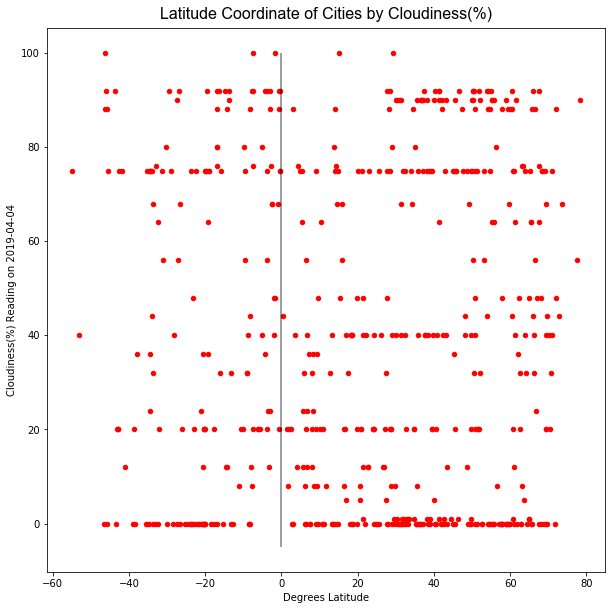

<Figure size 432x288 with 0 Axes>

In [57]:

ax1 = weather_data.plot.scatter(x='Latitude', y='Cloudiness', c='Red')

plt.vlines(0, -5, 100, alpha=0.5)


plt.title("Latitude Coordinate of Cities by Cloudiness(%)", fontdict=title_font)
plt.xlabel('Degrees Latitude')
plt.ylabel('Cloudiness(%) Reading on 2019-04-04')

# Show plot
fig = plt.gcf()
fig.set_size_inches(10, 10)
plt.show()

plt.savefig("latitude_cloudiness.png")

#### Latitude vs. Wind Speed Plot

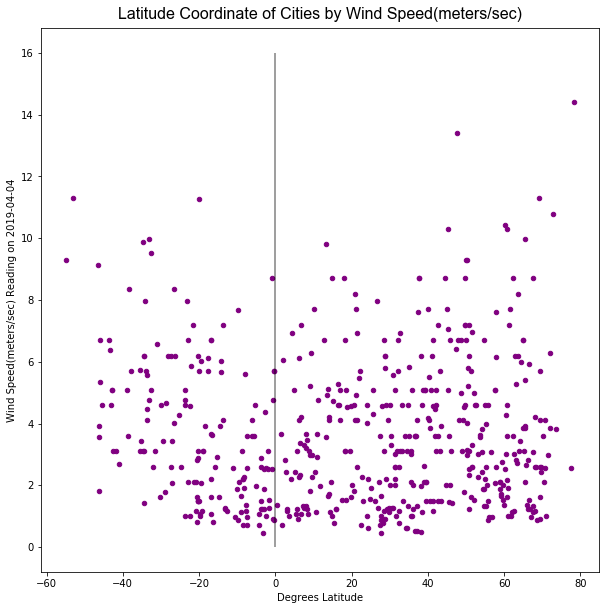

<Figure size 432x288 with 0 Axes>

In [56]:
ax1 = weather_data.plot.scatter(x='Latitude', y='Windspeed', c='Purple')

plt.vlines(0, 0, 16, alpha=0.5)

plt.title("Latitude Coordinate of Cities by Wind Speed(meters/sec)", fontdict=title_font)
plt.xlabel('Degrees Latitude')
plt.ylabel('Wind Speed(meters/sec) Reading on 2019-04-04')

# Show plot
fig = plt.gcf()
fig.set_size_inches(10, 10)
plt.show()

plt.savefig("latitude_windspeed.png")